In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn

In [2]:
data_wine = pd.read_csv('Desktop/winequality-red.csv')
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Probing the data and cloumns

In [3]:
data_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


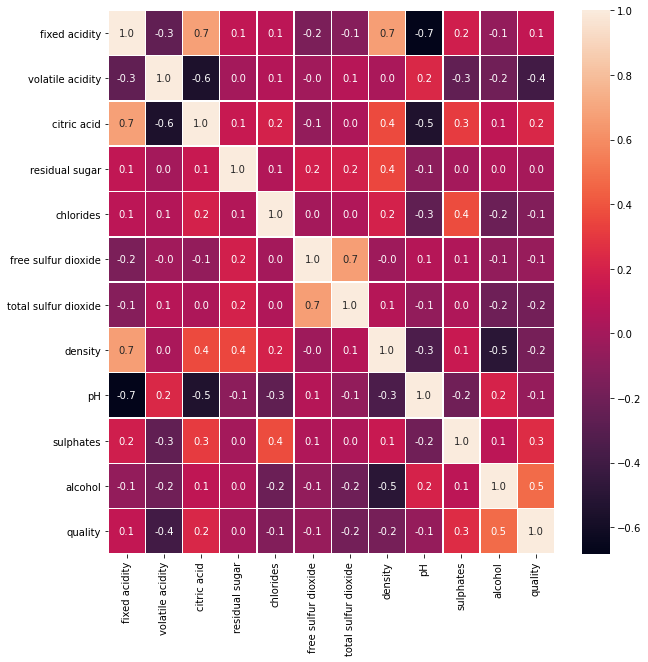

In [5]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_wine.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### I've added a heat map to see which elements are the most related to wine quality

In [6]:
data_wine.isnull().values.sum()

0

We have no null values, that is perfect.

array([[<AxesSubplot:title={'center':'quality'}>]], dtype=object)

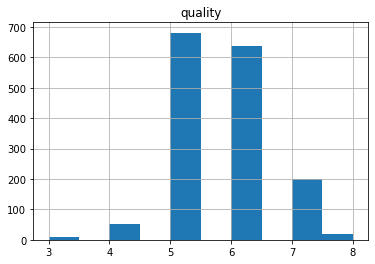

In [7]:
data_wine.hist(column = 'quality')

Checking the distribution of wine quality, and setting a benchmark for good quality wine.

In [8]:
data_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

This means there is no wine with quality 1,2,9,10

In [9]:
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Checking some basic statistics of the data.

<AxesSubplot:>

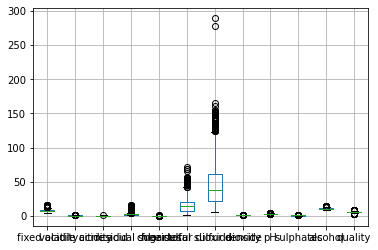

In [10]:
data_wine.boxplot()

This is the boxplot of all columns, we can see that two of those have many out liers, lets probe those.

<AxesSubplot:>

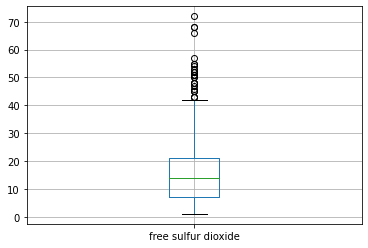

In [11]:
data_wine.boxplot(column='free sulfur dioxide')

<AxesSubplot:>

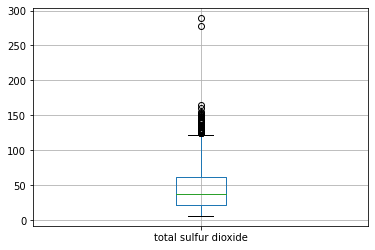

In [12]:
data_wine.boxplot(column='total sulfur dioxide')

both sulfur dioxide columns have some outliers, but it is okay to keep them as they dont skey the data too much.

In [13]:
binary =[]
for i in data_wine['quality']:
    if  i < 7:
        binary.append('0')
    elif i >= 7:
        binary.append('1')
data_wine['goodornot'] = binary

I have created a new variable good or not, which replaces the quality variable and converts it into binary.
any wine with quality 7 or greator is given the number 1, and lower quality is given the number 0.
this way we can easily train out algorithms.

In [14]:
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodornot
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [15]:
del data_wine['quality']

We don't need the quality variable anymore as we have converted it..

In [16]:
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodornot
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [17]:
data_wine['goodornot'].value_counts()

0    1382
1     217
Name: goodornot, dtype: int64

Checking how many quantities we have of each quality.

In [18]:
x = data_wine.iloc[:,:11]
y = data_wine['goodornot']

now I have chosen all the coulmns as training data, and the goodornot variable for checking

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

Adding some useful imports for ML

In [20]:
print(X)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

I have chosen to split the train:test data as 0.8:0.2 

### Decision tree algorithm

In [22]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       290
           1       0.48      0.77      0.59        30

    accuracy                           0.90       320
   macro avg       0.73      0.84      0.77       320
weighted avg       0.93      0.90      0.91       320



We have good accuracy of 90% here

### Random Forest algorithm

In [23]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       290
           1       0.67      0.60      0.63        30

    accuracy                           0.93       320
   macro avg       0.81      0.78      0.80       320
weighted avg       0.93      0.93      0.93       320



we have 93% accuracy, even better.

### AdaBoost algorithm

In [24]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       290
           1       0.52      0.43      0.47        30

    accuracy                           0.91       320
   macro avg       0.73      0.70      0.71       320
weighted avg       0.90      0.91      0.91       320



91% accuracy not bad

### Gradient boosting algorithm

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       290
           1       0.53      0.57      0.55        30

    accuracy                           0.91       320
   macro avg       0.74      0.76      0.75       320
weighted avg       0.92      0.91      0.91       320



91% accuracy in this

We can conclude that for this data set, the random forest algorith is the best at 93%